In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def plot_metric(metric_name, agents, setups, mean_values, std_values):
    """
    Plots a single metric's performance for multiple agents and setups.

    Args:
        metric_name (str): Name of the metric to be plotted.
        agents (list of str): Names of the agents.
        setups (list of str): Names of the setups.
        mean_values (np.ndarray): Mean values (shape: [agents, setups]).
        std_values (np.ndarray): Standard deviations (shape: [agents, setups]).
        colors (list of tuple): RGB colors for each agent.
        hatch_patterns (list of str): Hatching patterns for each setup.
    """
        
    # RGB colors for each agent
    colors = [
        (0.22, 0.49, 0.72),  # Blue for Agent 1
        (0.87, 0.37, 0.37)   # Red for Agent 2
    ]
    
    # Hatch patterns for each setup
    hatch_patterns = ['', '\\']

    num_agents = len(agents)
    num_setups = len(setups)
    x = np.arange(num_agents)  # One group per agent
    width = 0.35  # Bar width

    fig, ax = plt.subplots(figsize=(8, 5))

    # Plot data
    for j, setup in enumerate(setups):
        # Adjust the offset to center bars within each group
        ax.bar(
            x + (j - (num_setups - 1) / 2) * width / num_setups,  # Center the group
            mean_values[:, j],
            width / num_setups,  # Width for each bar within the group
            color=[colors[i] for i in range(num_agents)],
            edgecolor='black',
            hatch=hatch_patterns[j],
            yerr=std_values[:, j],
            capsize=5,
            label=f'{setup}'
        )

    # Add labels, title, and grid
    ax.set_xlabel('Agents')
    ax.set_ylabel(metric_name)
    ax.set_title(f'{metric_name} Performance')
    ax.set_xticks(x)
    ax.set_xticklabels(agents)
    ax.axhline(0, color='black', linewidth=1, linestyle='--')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Fix legend
    setup_patches = [Patch(facecolor='white', edgecolor='black', hatch=hatch_patterns[j], label=setups[j]) for j in range(num_setups)]
    ax.legend(handles=setup_patches, loc='upper left', bbox_to_anchor=(1, 1), frameon=False)

    # Reduce the extra space around the plot
    plt.tight_layout()
    plt.show()

# Example data
agents = ['Efficient Agent', 'Inefficient Agent']
setups = ['ILPPO', 'IPPO']

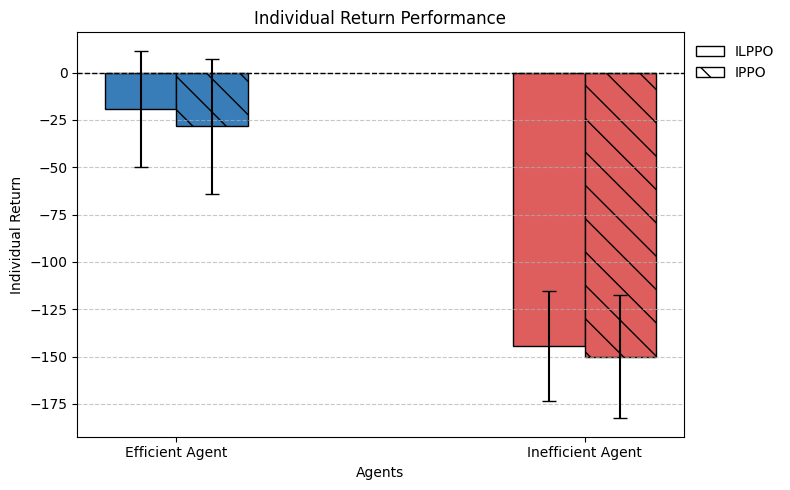

In [12]:
metric_name = 'Individual Return'

# Mean and std values for the selected metric (shape: [agents, setups])
mean_values = np.array([
    [-19.11, -28.26],  # Agent 1 for ILPPO, IPPO
    [-144.21, -150.08]  # Agent 2 for ILPPO, IPPO
])
std_values = np.array([
    [30.72, 35.68],
    [29.04, 32.58]
])

# Call the function
plot_metric(metric_name, agents, setups, mean_values, std_values)

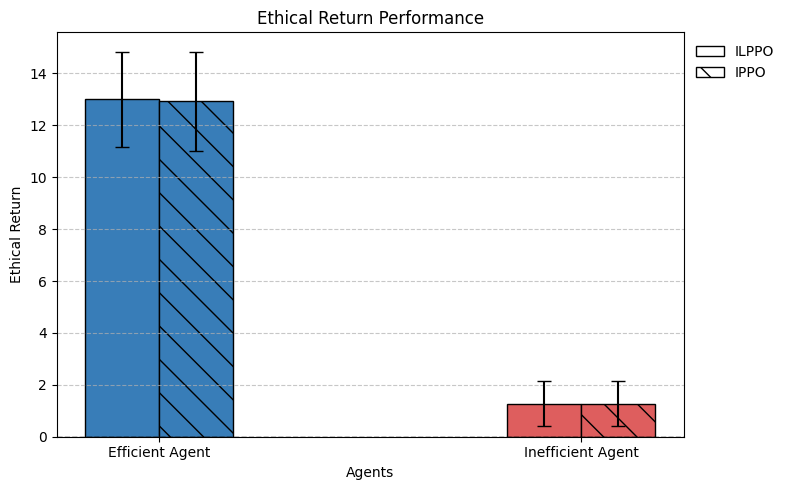

In [13]:
metric_name = 'Ethical Return'

# Mean and std values for the selected metric (shape: [agents, setups])
mean_values = np.array([
    [13.0, 12.93],  # Agent 1 for ILPPO, IPPO
    [1.28, 1.28]  # Agent 2 for ILPPO, IPPO
])
std_values = np.array([
    [1.83, 1.91],
    [0.85, 0.86]
])

# Call the function
plot_metric(metric_name, agents, setups, mean_values, std_values)

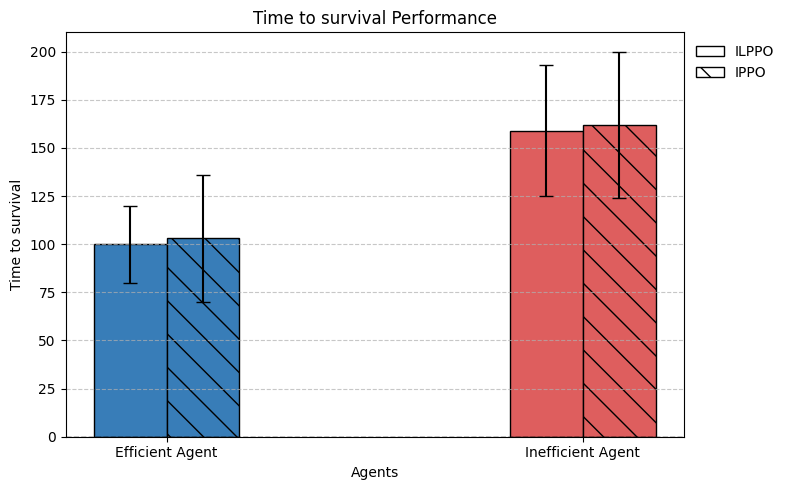

In [14]:
metric_name = 'Time to survival'

# Mean and std values for the selected metric (shape: [agents, setups])
median_values = np.array([
    [100, 103],  # Agent 1 for ILPPO, IPPO
    [159, 162]  # Agent 2 for ILPPO, IPPO
])
iqr_values = np.array([
    [20.0, 33],
    [34.0, 38]
])

# Call the function
plot_metric(metric_name, agents, setups, median_values, iqr_values)